In [1]:
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv("sample.csv",header = None)

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

def RMSE(estimates,actual):
    e2 = [(estimate - actual)**2 for estimate  in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

def  SampleSize(data, max = 1):
    if max == 1:
        max = len(data)
    ns = range(1,max)
    stderr = []
    xbar = []
    mu = np.mean(data)
    for n in ns:
        means = []
        for _ in range(1000):
            xs = np.random.choice(data, n)
            means.append(np.mean(xs))
        stderr.append(RMSE(means, mu))
        xbar.append(np.mean(means))
    xbar = np.array(xbar)
    stderr = np.array(stderr)
    rate = stderr/xbar*100
    
    fig,axis1 = plt.subplots()
    axis2 = axis1.twinx()
    
    axis1.plot(ns,xbar + stderr, color = "blue", marker='o')
    axis1.plot(ns,xbar- stderr, color = "blue", marker='o')
    axis1.plot(ns, xbar, "o",color="red")
    axis1.axhline(mu,color = "red")
    axis2.plot(ns, rate, color="green", marker='+')
    axis2.set_ylabel("Error Rate(%)", color= "green")
    axis1.set_xlabel("Number of n")
    plt.show()

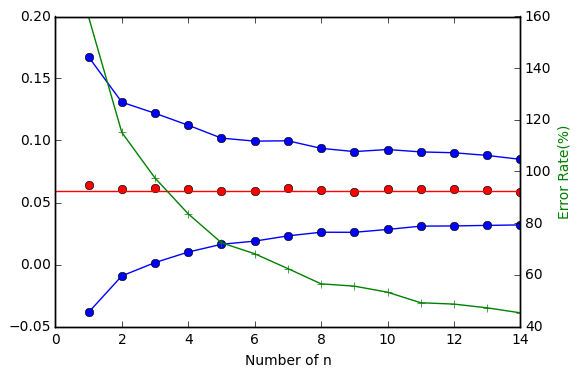

In [4]:
SampleSize(df[0],max=15)